# Basic plots for newscatcher dataset

### Sentiment for top 30 sources

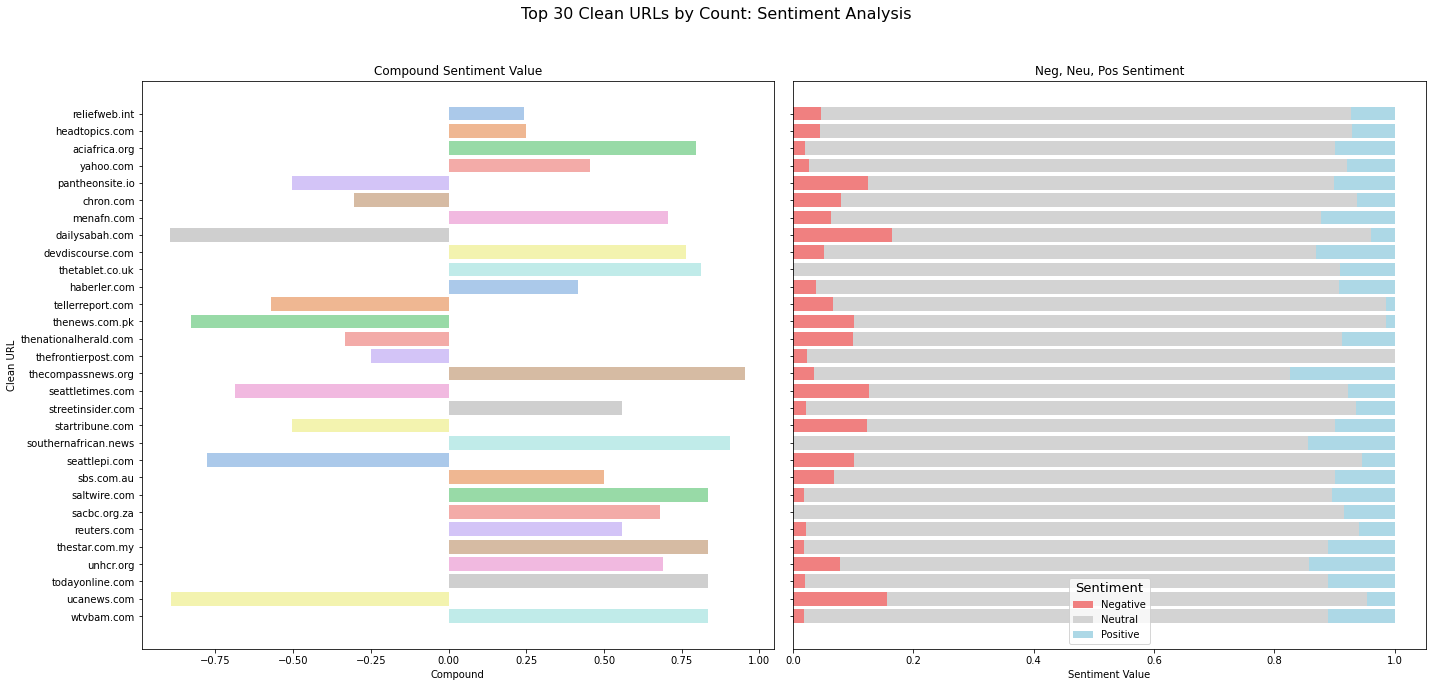

In [1]:
import pandas as pd
import viz 
# Load the dataset and convert 'published_date' to datetime
df = pd.read_csv('news_analysis.csv')
df['published_date'] = pd.to_datetime(df['published_date'])

# Example usage
viz.plot_top_n_sentiments(df, N=30)


### Entity counts and top 30 Organisations

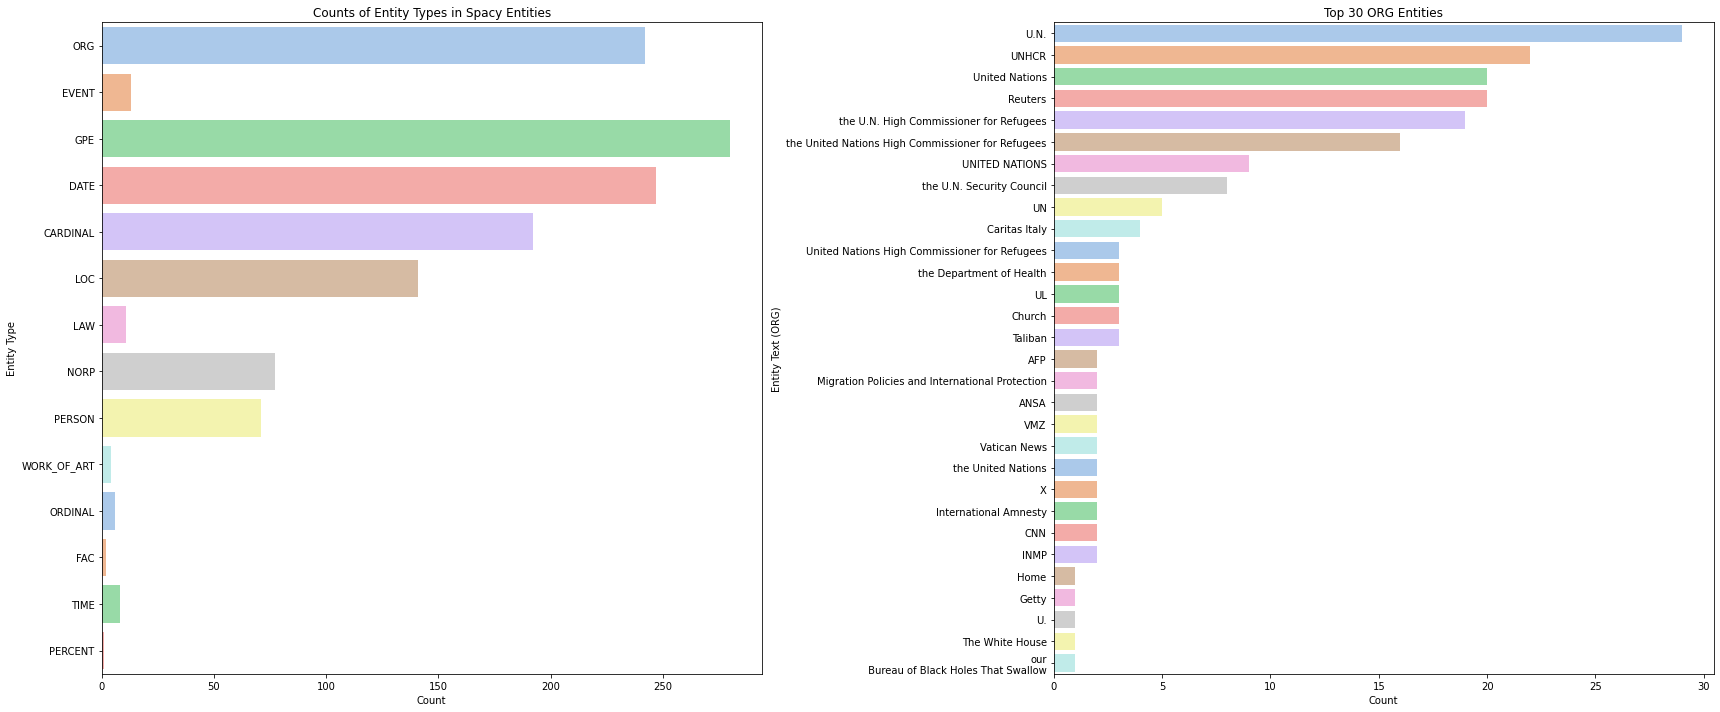

In [2]:

# Example usage
# Make sure to replace 'df' with your actual DataFrame containing the data
viz.plot_entity_types_and_top_n_entities(df, ent_type='ORG', N=30)

### Time series of sentiment (3 day intervals)

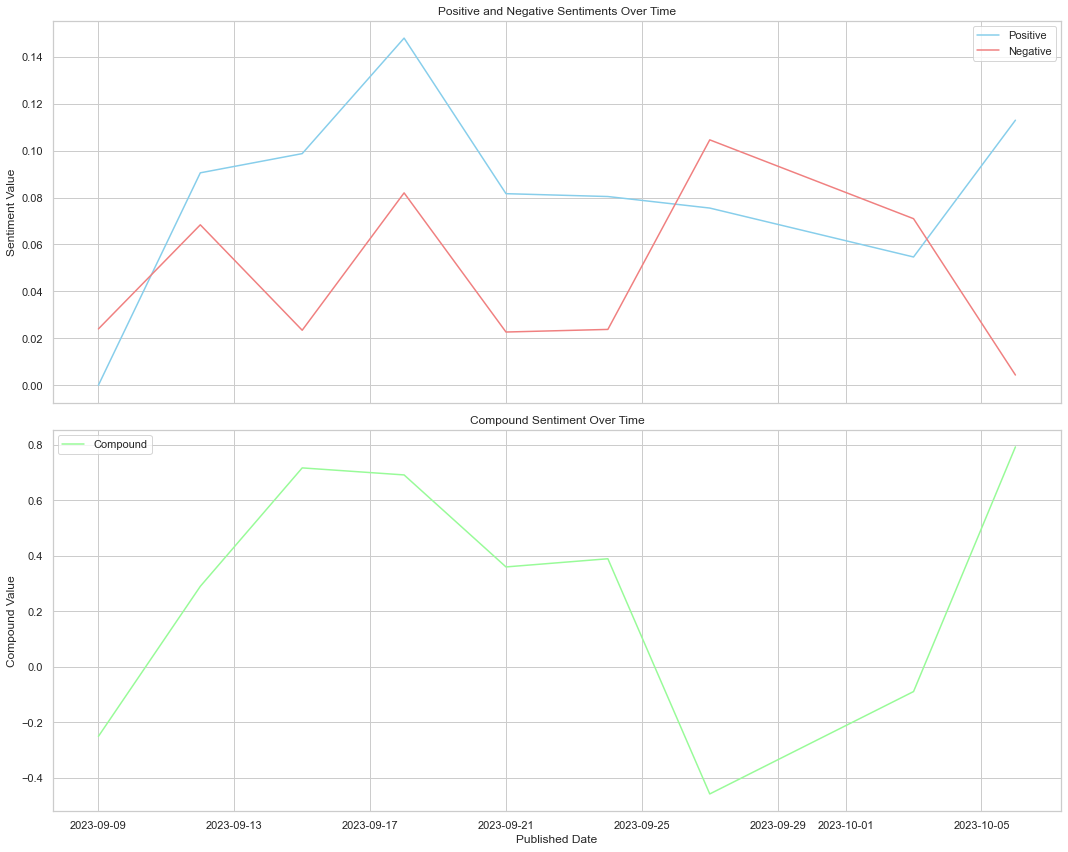

In [3]:
viz.plot_sentiments_with_pastel_lines(df, interval='3D')